### Portfolio Diagram
Dependencies
- `matplotlib`
- `numpy`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FuncFormatter

matplotlib.style.use('ggplot')

In [2]:
# Rate of Returns and Risk of 2 assets
ror = [0.01, 0.02]
risk = [0.02, 0.03]

In [3]:
num_split_points = 100

In [4]:
alpha = np.linspace(0, 1, num_split_points)

def portflio_risk(a, corr):
    t1 = (1-a)*risk[0]
    t2 = (a)*risk[1]
    return np.sqrt(t1**2+t2**2+2*corr*t1*t2)

def generate_portfolio(corr):
    risk_range = np.zeros(num_split_points)
    ror_range = np.zeros(num_split_points)
    for i, a in enumerate(alpha):    
        risk_range[i] = portflio_risk(a, corr)
        ror_range[i] = (1-a)*ror[0]+a*ror[1]
    return risk_range, ror_range

Let $\sigma_1$ and $\mu_1$ be the variance risk and rate of return assiciated with asset $A_1$ and $\sigma_2$ and $\mu_2$ with asset $A_2$. Let $\sigma_p$ and $\mu_p$ be the risk and rate of return of the portfolio, then

\begin{align}
& \mu_p = (1-\alpha)\mu_1 + \alpha \mu_2 \\
& \sigma_p^2 = (1-\alpha)^2 \sigma_1^2 + \alpha^2 \sigma_2^2 + 2(1-\alpha)\alpha\rho\sigma_1\sigma_2
\end{align}

where $\rho$ is correlation between both assets and $\alpha \epsilon [0,1] $

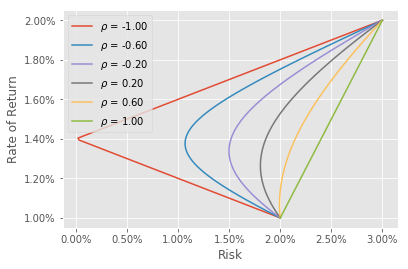

In [5]:
plot = plt.figure()
legends = []
for corr in np.linspace(-1,1,6):
    risk_plot, ror_plot = generate_portfolio(corr)
    curve_legend, = plt.plot(risk_plot, ror_plot, label=r'$\rho$ = %0.2f'%corr)
    legends.append(curve_legend)

plt.xlabel("Risk")
plt.ylabel("Rate of Return")
plt.legend(handles = legends)
ax = plot.get_axes()[0]
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.2%}'.format(y)))
ax.xaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.2%}'.format(y)))
plt.show()
plt.show()